In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = '/Users/amirrezakamkar/Desktop/Works_in_progress/Ironhack/5_5th_week/Project/2nd_project/data/clean/combined_data_test.txt'
df = pd.read_csv(url)

In [9]:
df.head(10)

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,9999832,145538019_54444341400,472154369_16714624241_585315,step_1,2017-05-16 16:46:11,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,Test
1,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,Test
2,9999729,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
3,9999729,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
4,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
5,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
6,9999729,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
7,9999729,834634258_21862004160,870243567_56915814033_814203,start,2017-05-08 16:08:25,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
8,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
9,9999729,843385170_36953471821,493310979_9209676464_421146,step_2,2017-04-20 14:27:36,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test


In [13]:
df['date_time'] = pd.to_datetime(df['date_time'])

# Sort by client_id and date_time to ensure the steps are in chronological order
df = df.sort_values(by=['client_id', 'date_time'])

# Define the process steps in the correct order
process_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Create a new column that shows the next step
df['next_step'] = df.groupby('client_id')['process_step'].shift(-1)

# Create a column to identify "step back" (where the next step is lower in the process order)
df['is_step_back'] = df.apply(lambda row: process_order.index(row['next_step']) < process_order.index(row['process_step']) 
                              if pd.notnull(row['next_step']) else False, axis=1)

# Count the number of "step back" errors
step_back_errors = df['is_step_back'].sum()

# Display the rows with step back errors
step_back_rows = df[df['is_step_back'] == True]

print(f"Number of step back errors: {step_back_errors}")
step_back_rows

Number of step back errors: 19084


,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,next_step,is_step_back
176614,1346,123474046_4204671056,27144337_83739845380_214282,step_1,2017-06-06 18:20:36,14.0,177.0,46.0,F,2.0,822512.91,3.0,6.0,Test,start,True
176611,1346,123474046_4204671056,27144337_83739845380_214282,step_3,2017-06-06 18:24:50,14.0,177.0,46.0,F,2.0,822512.91,3.0,6.0,Test,start,True
176596,1516,182314299_63168583136,481123290_95510977345_707323,step_2,2017-04-05 15:54:39,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,step_1,True
176595,1516,182314299_63168583136,481123290_95510977345_707323,step_2,2017-04-05 15:56:00,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,start,True
176594,1516,182314299_63168583136,481123290_95510977345_707323,step_2,2017-04-05 15:57:28,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,step_1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,9995295,719082482_48238561745,944432037_72425410366_517931,step_1,2017-03-29 11:18:50,33.0,397.0,58.0,U,2.0,166663.77,2.0,5.0,Test,start,True
44,9998156,255983388_34400418109,254203981_1117450921_444839,step_3,2017-04-02 23:44:13,8.0,98.0,25.5,U,2.0,31723.51,5.0,8.0,Test,step_2,True
20,9999150,665127594_52605538620,982803842_91891255980_123078,step_1,2017-05-29 16:55:18,5.0,66.0,30.0,U,3.0,97141.71,6.0,9.0,Test,start,True
2,9999729,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,start,True


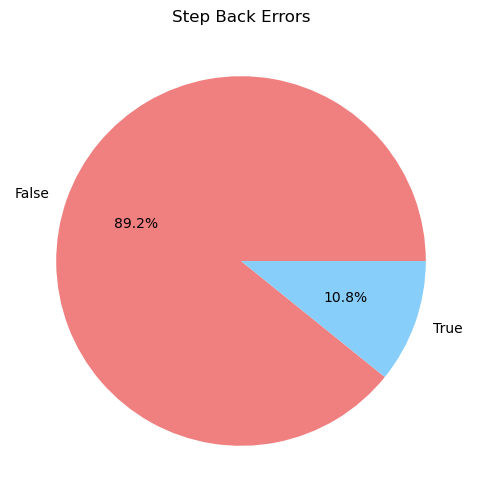

In [21]:
step_back_counts = df['is_step_back'].value_counts()

# Plot pie chart for step back counts
plt.figure(figsize=(6,6))
plt.pie(step_back_counts, labels=step_back_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Step Back Errors')
plt.savefig('step_back_errors_pie_chart.png', format='png')

       client_id          start_time        confirm_time  process_duration
0        4192640 2017-03-15 00:44:38                 NaT               NaN
1        6752370 2017-03-15 05:43:13                 NaT               NaN
2        2685910 2017-03-15 07:47:11 2017-03-15 07:50:33          3.366667
3        5616882 2017-03-15 10:16:59                 NaT               NaN
4        7794004 2017-03-15 11:03:20 2017-03-15 11:10:28          7.133333
...          ...                 ...                 ...               ...
26667    4296369 2017-06-20 22:39:50                 NaT               NaN
26668     351901 2017-06-20 22:40:09 2017-06-20 22:44:04          3.916667
26669    7107441 2017-06-20 23:10:44                 NaT               NaN
26670    6800679 2017-06-20 23:14:06                 NaT               NaN
26671    1545935 2017-06-20 23:17:42 2017-06-20 23:21:23          3.683333

[26672 rows x 4 columns]
Average process duration: 1956.5141078575182 minutes


In [63]:
# Step 1: Filter and get the last 'start' and 'confirm' time for each client
start_df = df[df['process_step'] == 'start'].sort_values('date_time').groupby('client_id').tail(1)[['client_id', 'date_time']].rename(columns={'date_time': 'start_time'})
confirm_df = df[df['process_step'] == 'confirm'].sort_values('date_time').groupby('client_id').tail(1)[['client_id', 'date_time']].rename(columns={'date_time': 'confirm_time'})

# Step 2: Merge the two DataFrames on client_id
merged_df = pd.merge(start_df, confirm_df, on='client_id', how='left')  # use 'left' to keep all clients with 'start' step

# Step 3: Calculate the process time (confirm_time - start_time) in minutes
merged_df['process_duration'] = (merged_df['confirm_time'] - merged_df['start_time']).dt.total_seconds() / 60  # Convert to minutes

# Step 4: Handle customers who did not finish the process (no 'confirm' step)
# Customers without a confirm step will have NaN in 'process_duration'
merged_df['process_duration'] = merged_df['process_duration'].fillna('Not Completed')  # Or use any other placeholder for missing process durations

# Show the result with process duration for each client
merged_df[['client_id', 'start_time', 'confirm_time', 'process_duration']]

,client_id,start_time,confirm_time,process_duration
0,4192640,2017-03-15 00:44:38,NaT,Not Completed
1,6752370,2017-03-15 05:43:13,NaT,Not Completed
2,2685910,2017-03-15 07:47:11,2017-03-15 07:50:33,3.366667
3,5616882,2017-03-15 10:16:59,NaT,Not Completed
4,7794004,2017-03-15 11:03:20,2017-03-15 11:10:28,7.133333
...,...,...,...,...
26667,4296369,2017-06-20 22:39:50,NaT,Not Completed
26668,351901,2017-06-20 22:40:09,2017-06-20 22:44:04,3.916667
26669,7107441,2017-06-20 23:10:44,NaT,Not Completed
26670,6800679,2017-06-20 23:14:06,NaT,Not Completed
